# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
data.columns

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [4]:
# Fresh Filter
fresh_q1 = 3127.750000
display(data.loc[data.Fresh < fresh_q1, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,1020,8816,12121,134,4508,1080
31,2612,4339,3133,2088,820,985
34,1502,1979,2262,425,483,395
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72
46,3103,14069,21955,1668,6792,1452
53,491,10473,11532,744,5611,224
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
68,2446,7260,3993,5870,788,3095


In [5]:
# Grocery Filter
grocery_q1 = 2153.000000
display(data.loc[data.Grocery < grocery_q1, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
21,5567,871,2010,3383,375,569
39,56159,555,902,10002,212,2916
50,6269,1095,1980,3860,609,2162
54,27329,1449,1947,2436,204,1333
58,13779,1970,1648,596,227,436
69,8352,2820,1293,779,656,144
75,20398,1137,3,4407,3,975
78,10766,1175,2067,2096,301,167
83,20874,1563,1783,2320,550,772
90,11405,596,1638,3347,69,360


In [6]:
# Grocery Filter
grocery_q3 = 10655.750000
display(data.loc[data.Grocery > grocery_q3, :].head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
9,6006,11093,18881,1159,7425,2098
10,3366,5403,12974,4400,5977,1744
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168
16,1020,8816,12121,134,4508,1080
23,26373,36423,22019,5154,4337,16523
24,22647,9776,13792,2915,4482,5778
28,4113,20484,25957,1158,8604,5206
30,18815,3610,11107,1148,2134,2963


In [7]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43, 39, 12]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,56159,555,902,10002,212,2916
2,31714,12319,11757,287,3881,2931


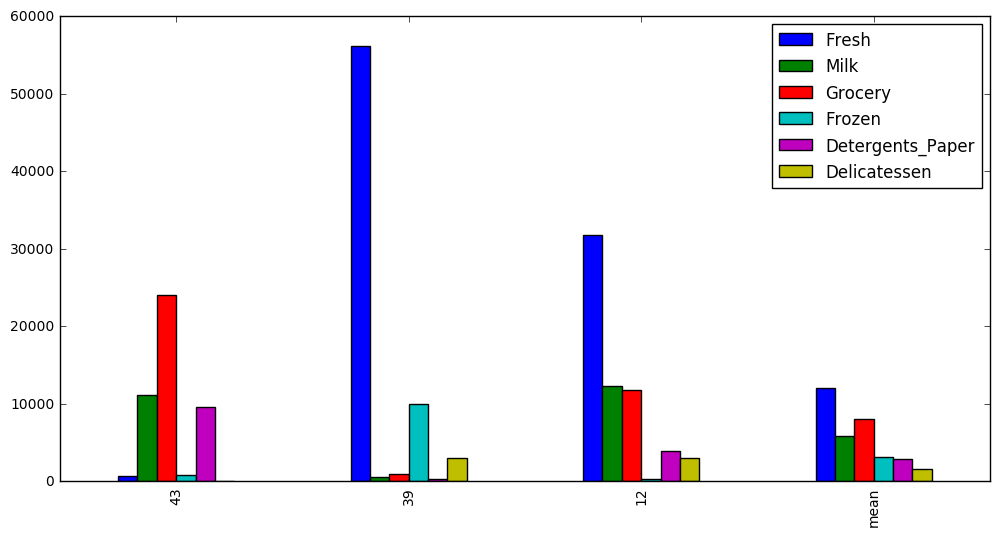

In [8]:
# Getting the mean values of the data
mean_data = data.describe().loc['mean', :]

# Appending the mean values to the sample data
samples_bar = samples.append(mean_data)

# Constructing the indices for the bar graph
samples_bar.index = indices + ['mean']

# Plotting the bar graph
samples_bar.plot(kind='bar', figsize = (12, 6))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

- Index 0 (Originally 43): Cafe
  - Low spending on **Fresh**, **Frozen**, and **Delicatessen** goods.
  - Majority of spending is on **Milk**, **Grocery**, and **Detergents_Paper** goods.
    - This establishment purchases more than the median in **Milk**, **Grocery**, and **Detergents_Paper** goods (for throw-away plates and cups), which is why this could be a cafe.
            
- Index 1 (Originally 39): Fresh Food Market
  - Majority of spending is on **Fresh** goods, with some spending on **Frozen** and very little on everything else.
    - This establishment purchases more than the median in **Fresh**, **Frozen**, and **Delicatessen** goods, which is why this could be a fresh food market.

- Index 2 (Originally 12): Restaurant
  - Majority of spending is on **Fresh**, **Milk**, and **Grocery** goods.
  - Very low spending on **Frozen** goods.
    - This establishment purchases more than the median in **Fresh**, **Milk**, **Grocery**, **Detergents_Paper**, and **Delicatessen** goods, which is why this could be a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop("Grocery", axis = 1)
# Confirmation of drop
#display(new_data.head(2))

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data["Grocery"], test_size = 0.25, random_state = 18)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 18).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print 'Prediction score on test set: ', score

feature_importance = regressor.feature_importances_

feature_importance = pd.DataFrame(feature_importance, index = data.columns.drop('Grocery'), columns = ['Feature Importance to Grocery'])

display(feature_importance)

Prediction score on test set:  0.709457941894


,Feature Importance to Grocery
Fresh,0.024596
Milk,0.043421
Frozen,0.012461
Detergents_Paper,0.904161
Delicatessen,0.015361


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

- I attempted to predict the **Grocery** feature.
- The reported prediction score was **0.709458**.
- I believe this feature is **not absolutely necessary** for identifying customers' spending habits as it seems to be loosely correlated with the five other features. However, the R^2 score is not high enough for this feature to be dropped from the dataset.

- I will compare the Grocery R^2 score with the other features' R^2 scores below.

In [10]:
# Comparing R^2 Scores

feature_list = list(data.columns)

# Creating a loop to test each feature
for feature in feature_list:
    
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis = 1)
    
    # Confirmation of drop
    #display(new_data.head(2))
    
    #Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.25, random_state = 18)
    
    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 18).fit(X_train, y_train)
    
    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print 'Prediction score for {} as the target label: {} '.format(feature, score)

Prediction score for Fresh as the target label: -0.139579967781 
Prediction score for Milk as the target label: 0.256332247022 
Prediction score for Grocery as the target label: 0.709457941894 
Prediction score for Frozen as the target label: -4.105349996 
Prediction score for Detergents_Paper as the target label: 0.5929114005 
Prediction score for Delicatessen as the target label: 0.433237001742 


**Comparisons:**

- The R^2 scores of **Fresh** and **Frozen** are negative, implying that those features are necessary for identifying customers' spending habits because the remaining features cannot explain the variation in them.
- The R^2 scores of the **Milk**, **Detergents_Paper** and **Delicatessen** features are quite low, implying they are necessary for identifying customers' spending habits.
- The R^2 score for **Grocery** is the highest of them all, and may not be necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

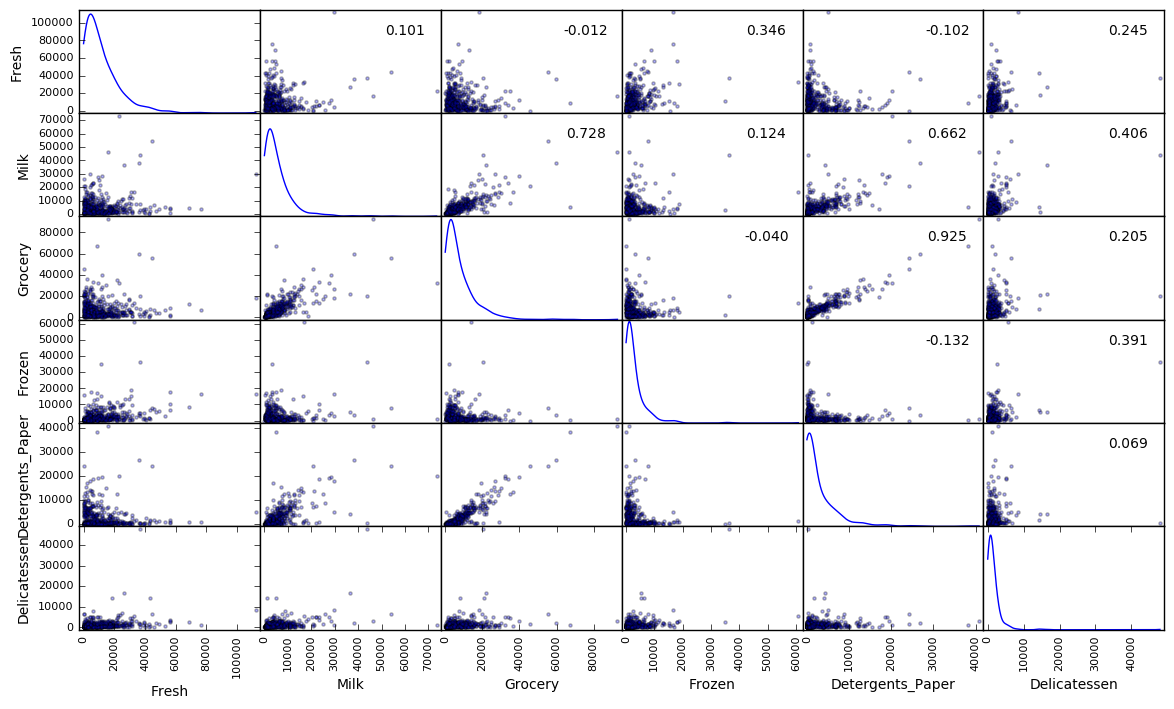

In [11]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()

for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords = 'axes fraction', ha = 'center', va = 'center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

- The plotted scatter matrix reveals some pairs of features that exhibit correlations following a linear trend to some degree. The observed results are as follows, listed from strongest to weakest correlation:

  - **Grocery** and **Detergents_Paper**.
  - **Grocery** and **Milk**.
  - **Milk** and **Detergents_Paper**.

- This confirms my suspicion about the relevance of the **Grocery** feature which I attempted to predict earlier; that it may not be necessary for identifying customers' spending habits.

- The data are **not normally distributed** due to the presence of many outliers in the graph.
- This distribution is skewed right (positively skewed), meaning most of the data points are located on the left while most outliers are on the right.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

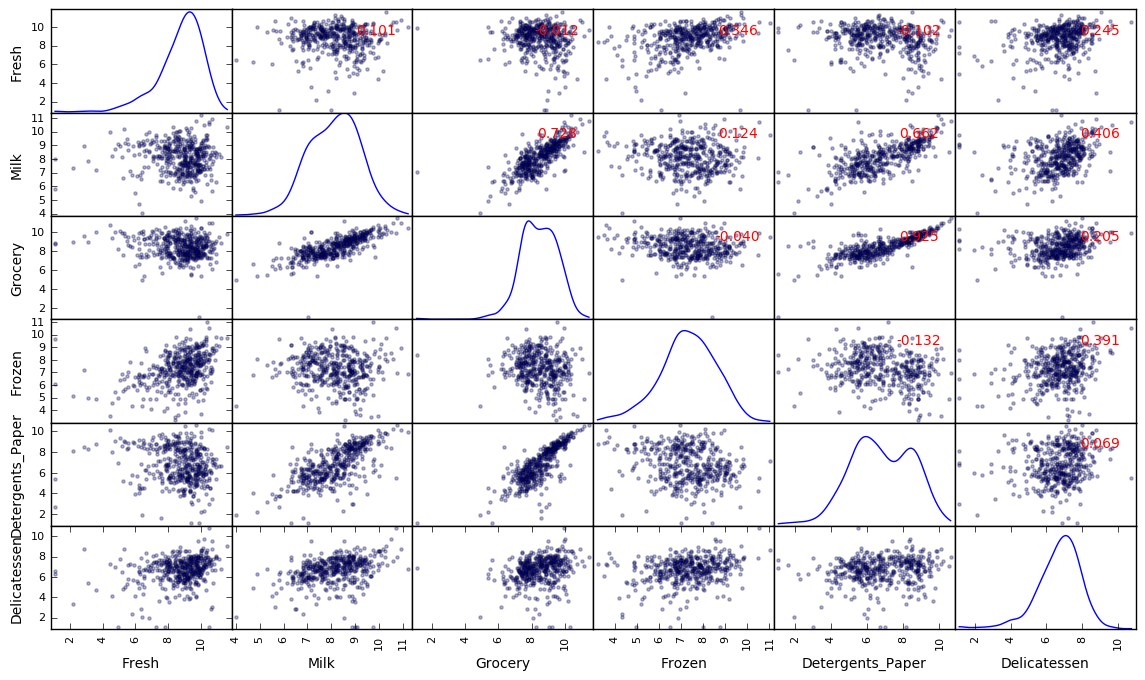

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k = 1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords = 'axes fraction', ha = 'center', va = 'center', color = 'red')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

- The correlations observed earlier are still present after the natural logarithm scaling to the data.

 - **Grocery** and **Detergents_Paper** appear to have a slightly **stronger** correlation.
 - **Grocery** and **Milk** appear to have a slightly **stronger** correlation.
 - **Milk** and **Detergents_Paper** appear to have a slightly **stronger** correlation.

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
2,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
outliers_list = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_rows = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #display(outliers_rows)
    
    feature_outliers_list = []
    
    feature_outliers_list.append(list(outliers_rows.index))
    print feature_outliers_list, "\n"
    #display(list(feature_outliers_list))
    
    outliers_list.append(list(outliers_rows.index))

import itertools

outliers = list(itertools.chain.from_iterable(outliers_list))


# List of unique outliers
unique_outliers = list(set(outliers))
print "List of Outliers:\n", unique_outliers, "\n"
print "Number of Outliers:\n", len(unique_outliers), "\n"

# List of duplicate outliers
duplicate_outliers = sorted(list(set([x for x in outliers if outliers.count(x) > 1])))
print "List of Duplicate Outliers:\n", duplicate_outliers, "\n"
print "Number of Duplicate Outliers:\n", len(duplicate_outliers), "\n"

    
# OPTIONAL: Select the indices for data points you wish to remove
#duplicate_outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[duplicate_outliers]).reset_index(drop = True)

# Original Data
print "Shape of Original Data:\n", data.shape, "\n"

# Cleaned Up Data
print "Shape of Processed Data:\n", good_data.shape, "\n"

# Data of the Outliers
print "DataFrame of the Duplicate Outliers: "
data.loc[duplicate_outliers]

Data points considered outliers for the feature 'Fresh':
[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]] 

Data points considered outliers for the feature 'Milk':
[[86, 98, 154, 356]] 

Data points considered outliers for the feature 'Grocery':
[[75, 154]] 

Data points considered outliers for the feature 'Frozen':
[[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]] 

Data points considered outliers for the feature 'Detergents_Paper':
[[75, 161]] 

Data points considered outliers for the feature 'Delicatessen':
[[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]] 

List of Outliers:
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183] 

Number of Outliers:
42 

List of Duplicate Outliers:
[65, 66, 75, 128, 154] 

Number of Duplicate Outliers:
5 

Shape of Original Data:
(440, 6) 

Shape of Proc

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


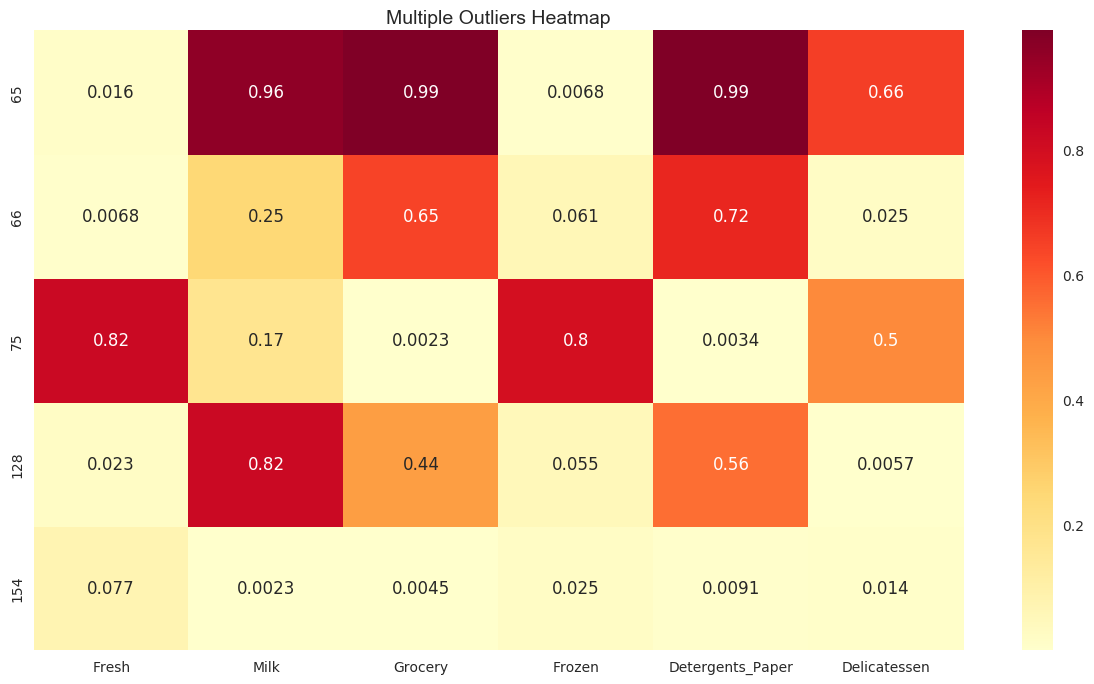

In [15]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns

percentiles = data.rank(pct = True)
percentiles = percentiles.iloc[duplicate_outliers]
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('Multiple Outliers Heatmap', fontsize = 14)
heat = sns.heatmap(percentiles, cmap="YlOrRd", annot = True)
display(heat)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

- There are 5 examples that are considered to be outliers: 65, 66, 75, 128, 154.
- These data points should be removed from the data set because they are outliers in more than one category.
  - This makes them not representational of general customers.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

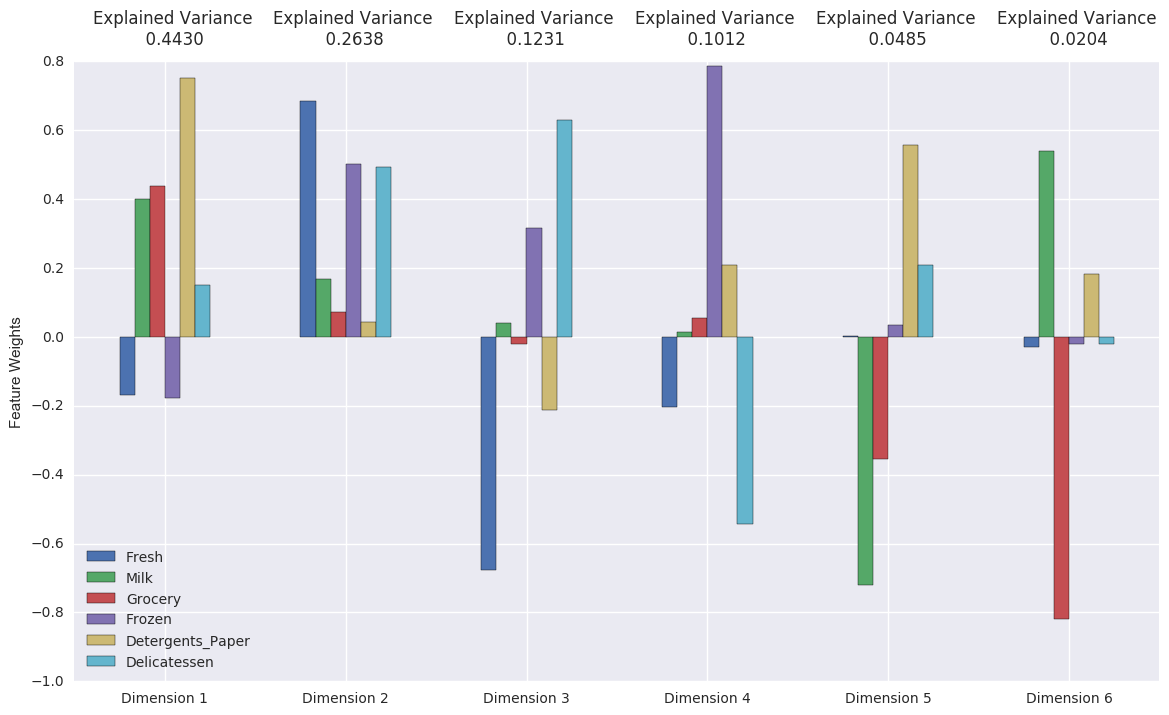

In [16]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [17]:
# Create DataFrame of Results
display(pca_results)

# Cumulative sum of explained variance should be equal to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,-0.1675,0.4014,0.4381,-0.1782,0.7514,0.1499
Dimension 2,0.2638,0.6859,0.1672,0.0707,0.5005,0.0424,0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,0.0026,-0.7192,-0.3554,0.0331,0.5582,0.2092
Dimension 6,0.0204,-0.0292,0.5402,-0.8205,-0.0205,0.1824,-0.0197


Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

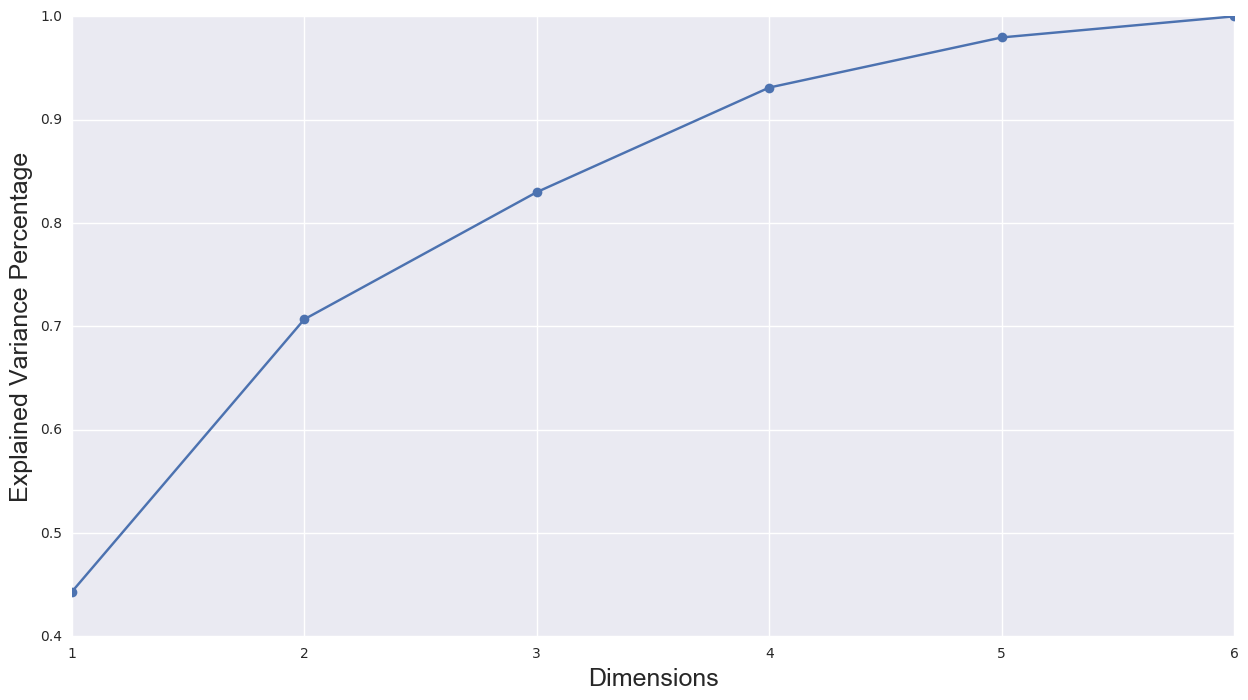

In [18]:
# Visualizing the Percent of Varance Explained
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Dimensions', fontsize = 18)
plt.ylabel('Explained Variance Percentage', fontsize = 18)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- 70.68% of the variance in the data is explained by the first and second principal components.

- 93.11% of the variance in the data is explained by the first four principal components.

- Principal Component Breakdown:

  - First Principal Component:
    - A positive increase here is associated with greatly _increased_ spending in **Milk**, **Grocery**, and **Detergents_Paper** goods, while there would be _decreased_ spending in **Fresh** and **Frozen** goods.
    - This confirms the initial findings that these three features are highly correlated.
    - This means that a customer who purchases one type of these goods will likely purchase another type in this set as well.
    - Customers in this segment purchase a lot of **Milk**, **Grocery**, and **Detergents_Paper** goods.
    
  - Second Principal Component:
    - A positive increase here is associated with greatly _increased_ spending in **Fresh**, **Frozen**, and **Delicatessen** goods, while there would be not as much spending in **Milk**, **Grocery**, and **Detergents_Paper** goods.
    - This means that a customer who purchases one type of these goods will likely purchase another type in this set as well.
    - This makes sense as the first principal component represents different features. And in the second principal component, the features of the first principal component have very small positive weights.
    - Customers in this segment purchase a lot of **Fresh**, **Frozen**, and **Delicatessen** goods.
        
  - Third Principal Component:
    - An increase here is associated with greatly _increased_ spending in **Delicatessen**, and a greatly _decreased_ spending in **Fresh** goods.
    
  - Fourth Principal Component:
    - An increase here is associated with greatly _increased_ spending in **Frozen** goods, and a greatly _decreased_ spending in **Delicatessen**.

    

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.1072,-2.7017,-0.6386,1.8708,-0.6452,-0.1333
1,-3.0426,2.5854,0.1965,-0.0757,1.4213,-0.0093
2,2.2406,1.2419,-1.0729,-1.9589,-0.2160,0.1782


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.1072,-2.7017
1,-3.0426,2.5854
2,2.2406,1.2419


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

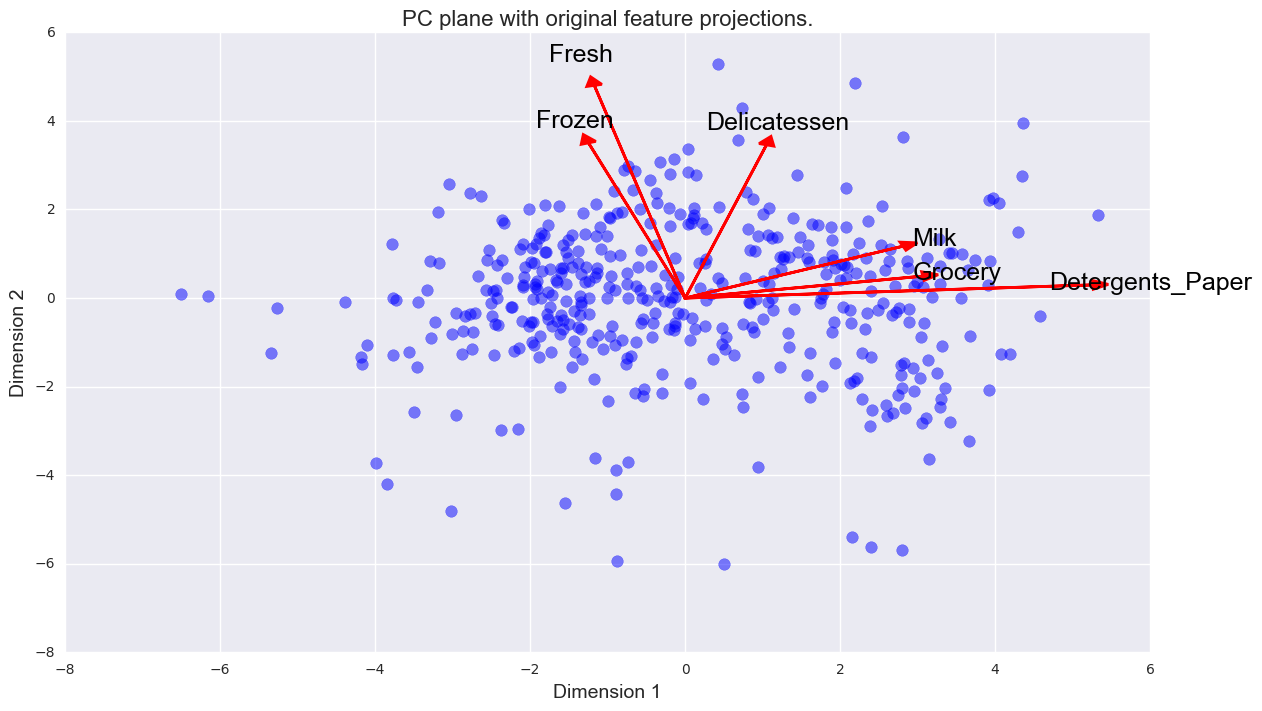

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

- **K-Means Clustering Advantages:**
  - Hard labelling so that all data points are in certain clusters
  - Less computationally expensive than a Gaussian Mixture Model
  - Guaranteed to converge (though it may be to a local optima depending on the initialization of clusters)
  - Scale-invariant
  - Easy to understand and implement
  - Works well in practice
  
  
- **Gaussian Mixture Model Advantages:**
  - Greater flexibility due to clusters having unconstrained covariances
  - Allows mixed memberships due to soft assignments (a point can belong to two clusters with varying probability)
  - Can look at probabilities to measure how sure the algorithm is that each point is in each cluster
  - Can model all elliptical clusters, as opposed to K-Means which assumes clusters are spherical
  
  
- **Chosen Algorithm:**
  - Gaussian Mixture Model
  - There is no clear demarcation in the dataset, indicating there may be a mixed membership problem.
  
  
- **References:**
  - http://scikit-learn.org/0.17/modules/mixture.html#gmm-classifier
  - https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
  - https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm
  - http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm
  

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

# Creating a range of clusters
range_n_clusters = list(range(2,11))

# Looping through clusters
for n_clusters in range_n_clusters:
    print "Number of Components: ", n_clusters
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = n_clusters, random_state = 0).fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    print "Cluster Centers: ", centers

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    print "Sample Predictions: ", sample_preds
    

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "Silhouette Score: ", score, "\n"

Number of Components:  2
Cluster Centers:  [[-1.30917139  0.1428472 ]
 [ 1.63707508 -0.17862565]]
Sample Predictions:  [1 0 1]
Silhouette Score:  0.411818864386 

Number of Components:  3
Cluster Centers:  [[-0.22119834 -1.16955807]
 [-1.57197685  0.2479092 ]
 [ 1.51663822  0.37497131]]
Sample Predictions:  [2 1 2]
Silhouette Score:  0.373560747175 

Number of Components:  4
Cluster Centers:  [[-1.07970175  0.70194911]
 [ 2.24330099  0.00623091]
 [-1.85033192 -0.4008721 ]
 [ 0.12961134 -0.99444975]]
Sample Predictions:  [1 0 1]
Silhouette Score:  0.308243479507 

Number of Components:  5
Cluster Centers:  [[ 2.77532934 -0.8836788 ]
 [-1.68675466 -0.00996996]
 [-1.40360331 -1.06440633]
 [-0.50946665  1.07628488]
 [ 1.93721492  0.27118486]]
Sample Predictions:  [0 2 4]
Silhouette Score:  0.295441470747 

Number of Components:  6
Cluster Centers:  [[-0.04588354  1.20875177]
 [-0.99022191 -0.41936122]
 [ 2.78231329 -1.40770641]
 [ 1.85958606  0.7636874 ]
 [-1.63611603  0.28031405]
 [-1.328

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

    Cluster Number : Silhouette Score
                 2 : 0.411818864386
                 3 : 0.373560747175
                 4 : 0.308243479507
                 5 : 0.295441470747
                 6 : 0.276478936811
                 7 : 0.323119845936
                 8 : 0.3120673235
                 9 : 0.290997808766
                10 : 0.311964697843
                
   - The cluster number with the best silhouette score is 2.
          

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [24]:
# Due to the loop implemented above used to determine the optimal number of clusters to use, 
# this resets the argument values for correctly displaying the optimal data clusters.
clusterer = GMM(n_components = 2, random_state = 0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

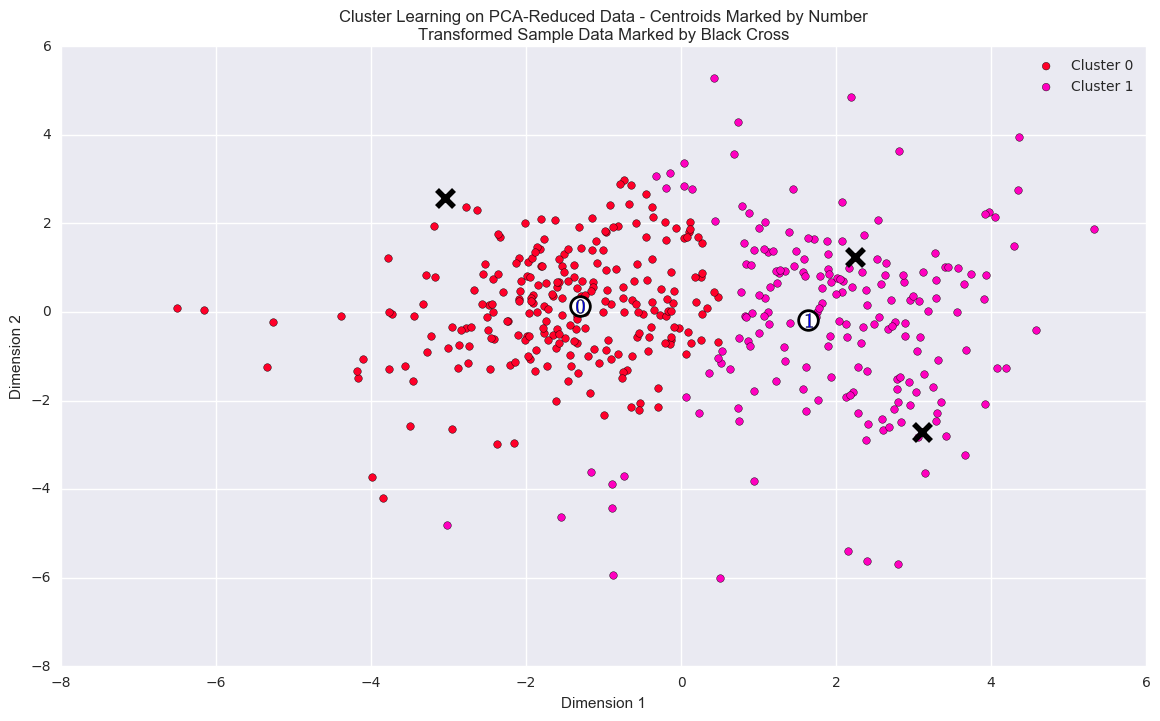

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0




Bar Plot of Cluster Centroids:


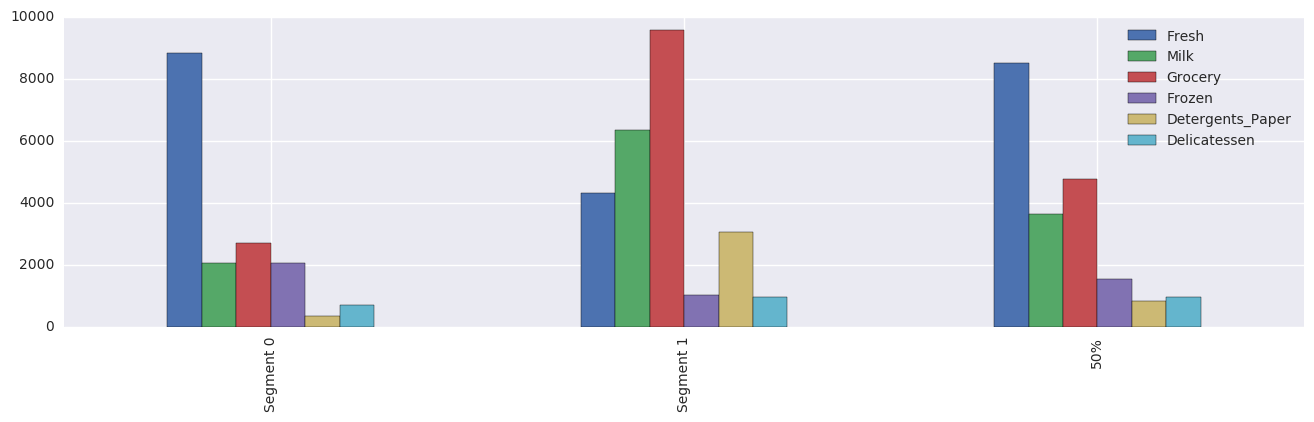

In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
print "\n"

# Adding the Median Values from the Data to Visualize the Cluster Centroids
true_centers = true_centers.append(data.describe().ix['50%'])
print "Bar Plot of Cluster Centroids:"
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [26]:
# Referencing the Statistical Description of the Dataset
print 'Statistical Description of the Dataset:'
display(data.describe())
print '\n'

# Cluster's Deviation from Median
print "Clusters' Deviation from Median:"
display(true_centers.drop('50%') - data.median())
print '\n'

Statistical Description of the Dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000




Clusters' Deviation from Median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,308.0,-1575.0,-2066.5,532.0,-479.5,-253.5
Segment 1,-4188.0,2720.0,4799.5,-490.0,2229.5,-20.5


**Answer:**

- I used deviations from the median, with reference to the statistical description of the dataset at the beginning of the project, because the mean value is sensitive to/affected by outliers and therefore would not produce meaningful comparisons.


- Segment 0:
    - The set of establishments in this segment have above median spending on **Fresh** and **Frozen** goods.
    - This segment may represent fresh food markets.
    

- Segment 1:
    - The set of establishments in this segment have above median spending on **Milk**, **Grocery**, and **Detergents_Paper** goods.
    - This segment may represent restaurants and cafes.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [28]:
print "Samples:"
display(samples)
print "\n"

# Samples' Deviation from the Median
print "Samples' Deviation from Median:"
display(samples - data.median())
print "\n"

# Cluster's Deviation from Median
print "Clusters' Deviation from Median:"
display(true_centers.drop('50%') - data.median())
print "\n"


# Probablities of Belonging to Each Cluster

for i,j in enumerate(pca_samples):
    print "Probability of Sample {}: {}".format(i, clusterer.predict_proba([j])[0])

Samples:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,56159,555,902,10002,212,2916
2,31714,12319,11757,287,3881,2931




Samples' Deviation from Median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-7874.0,7468.0,19242.5,-739.0,8712.5,-893.5
1,47655.0,-3072.0,-3853.5,8476.0,-604.5,1950.5
2,23210.0,8692.0,7001.5,-1239.0,3064.5,1965.5




Clusters' Deviation from Median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,308.0,-1575.0,-2066.5,532.0,-479.5,-253.5
Segment 1,-4188.0,2720.0,4799.5,-490.0,2229.5,-20.5




Probability of Sample 0: [ 0.00694393  0.99305607]
Probability of Sample 1: [ 0.9662578  0.0337422]
Probability of Sample 2: [ 0.10714758  0.89285242]


**Answer:**

- Sample 1:
    - This sample point best represents customer segment 1 (cluster 1), as the spending on **Milk**, **Grocery**, and **Detergents_Paper** is high.
    - The prediction for this sample point is consistent with this observation.
    
- Sample 2:
    - This sample point best represents customer segment 0 (cluster 0), as the spending on **Fresh** and **Frozen** is high.
    - The prediction for this sample point is consistent with this observation.
    
- Sample 3:
    - This sample point best represents customer segment 1 (cluster 1), as the spending on **Milk**, **Grocery**, and **Detergents_Paper** is high.
    - It should be noted that while spending on **Fresh** is high, spending on **Frozen** is low.
    - The prediction for this sample point is consistent with this observation.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

- Potential Impact on Segment 0:
    - There could be a substantial impact on Segment 0's customers by the change in delivery scheme.
    - This is because a significant portion of the products purchased by customers in this segment are perishable, i.e. **Fresh** goods.
    
    
- Potential Impact on Segment 1:
    - There should be little impact on Segment 1's customers by the change in the delivery scheme.
    - This is because the products purchased by the customers in this segment are mainly non-perishable, i.e. **Grocery** and **Detergents_Paper** goods.
    - There may be a larger impact on customers in this segment who purchase more **Milk** products, as this item is perishable. However, **Milk** products these days can last longer than a week, which may not cause as much of a negative impact on those customers.
    
    
- The impact on customers can be more firmly established by running an experiment to determine which group of customers would be more impacted by this change.
    - A random sample of 4 groups, 2 groups from each cluster, should be used for the experiment.
        - Groups 0a and 0b would be the groups from cluster 0.
            - Group 0a would be the group experiencing the change in delivery scheme.
            - Group 0b would be the control group, not experiencing the proposed change.
        - Groups 1a and 1b would be the groups from cluster 1.
            - Group 1a would be the group experiencing the change in delivery scheme.
            - Group 1b would be the control group, not experiencing the proposed change.
            
    - Change the delivery schedules for groups 0a and 1a.
    - Conduct a customer satisfaction survey for all groups.
    - Cross-reference the customers' level of satisfaction with their spending.
    - Customers experiencing a **negative** impact would have a low level of satisfaction and **decreased** (or similar) spending.
    - Customers experiencing a **positive** impact would have a high level of satisfaction and **increased** (or similar) spending.
    

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- Use a suitable classifier to classify the new clients based on their features, either a Support Vector Machine (SVC), Naive Bayes, or Logistic Regression.
- The target variable would be the cluster group.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [29]:
# Outliers Removed
duplicate_outliers

[65, 66, 75, 128, 154]

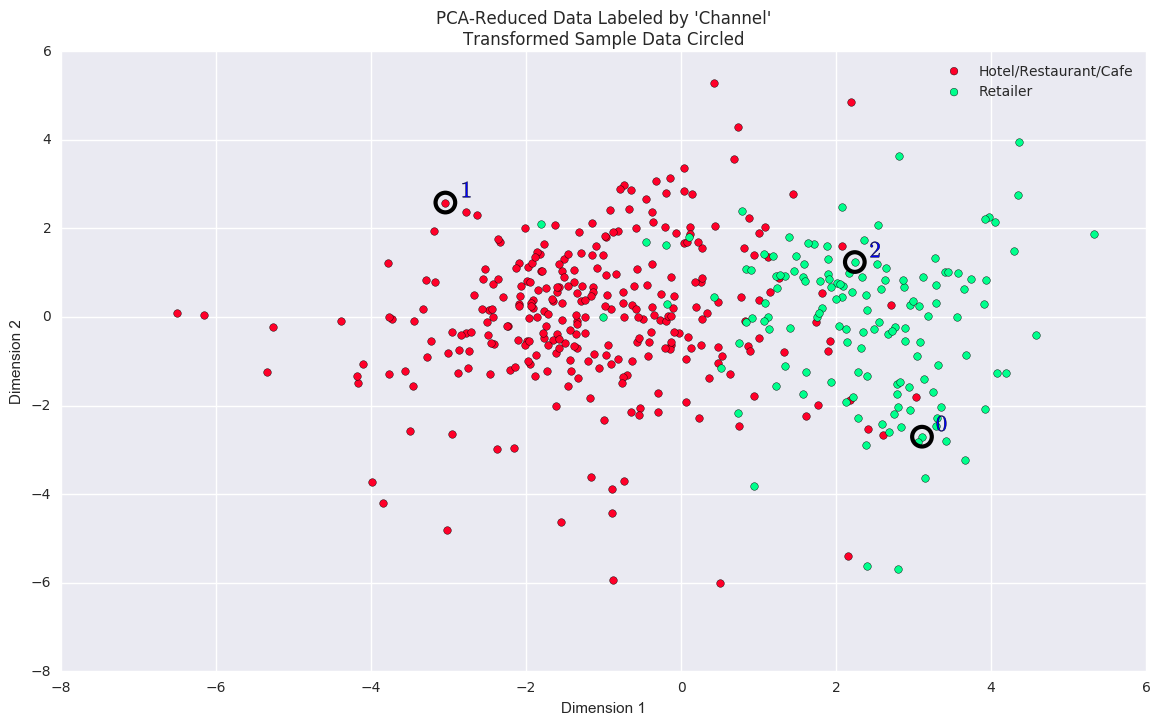

In [30]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, duplicate_outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The number of clusters I've chosen is consistent with the underlying distribution of 2 major clusters, therefore the clustering algorithm performed well.

- According to this distribution, there are customer segments that would be classified as purely 'Retailers' (on the extreme right) and purely 'Hotels/Restaurants/Cafes' (on the extreme left).

- These classifications are consistent with previous definitions of the customer segments to some extent:
    - The exact labels (i.e. "Hotel/Restaurant/Cafe" and "Retailer") used are not the same.
    - I believe this is because I had a different understanding/interpretation of the label terms prior to seeing this distribution. Definitions of these with their associated characteristics would have been helpful.
   

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.